<a href="https://colab.research.google.com/github/newmantic/Hull_White/blob/main/Hull_White.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

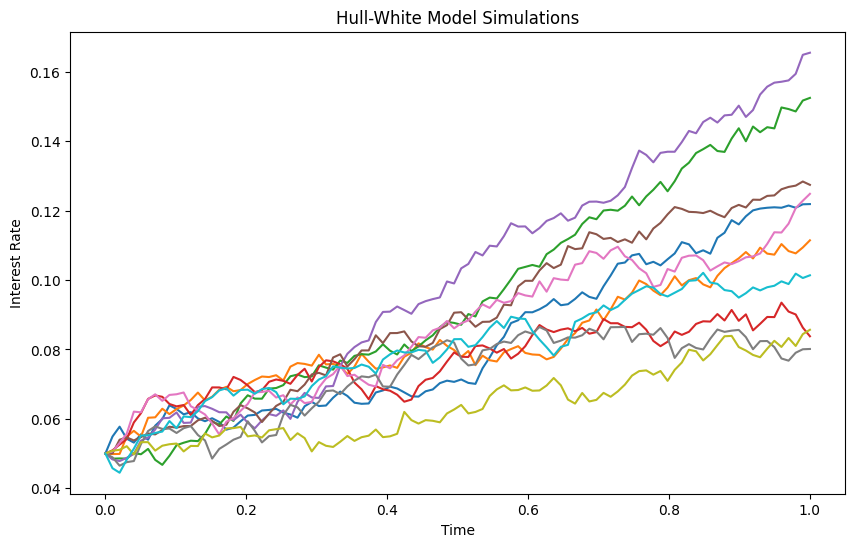

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Hull-White Model
def hull_white_model(r0, a, sigma, theta, T, dt, n_simulations):
    """Simulate the Hull-White model."""
    n_steps = int(T/dt)
    rates = np.zeros((n_simulations, n_steps))
    rates[:, 0] = r0
    time = np.linspace(0, T, n_steps)

    for t in range(1, n_steps):
        dr = (theta(time[t-1]) - a * rates[:, t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal(size=n_simulations)
        rates[:, t] = rates[:, t-1] + dr

    return rates


# Parameters for the Hull-White Model
r0_hw = 0.05       # initial interest rate
a_hw = 0.1         # speed of mean reversion
sigma_hw = 0.02    # volatility
theta_hw = lambda t: 0.05 + 0.01 * t  # time-dependent drift
T = 1.0            # time horizon
dt = 0.01          # time step
n_simulations = 1000  # number of simulations

# Simulate Hull-White Model
hull_white_rates = hull_white_model(r0_hw, a_hw, sigma_hw, theta_hw, T, dt, n_simulations)

# Plot results for Hull-White Model
plt.figure(figsize=(10, 6))
for i in range(min(n_simulations, 10)):  # Plot first 10 simulations
    plt.plot(np.linspace(0, T, int(T/dt)), hull_white_rates[i, :])
plt.title("Hull-White Model Simulations")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.show()
